In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Load the necessary packages and creating a function for Prediction and Evaluation**

---



---



In [ ]:
import pandas as pd
import numpy as np

# For the train-test split
from sklearn.model_selection import train_test_split,cross_val_predict

# For model buidling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay,classification_report

from sklearn.metrics import (f1_score, roc_auc_score,confusion_matrix, accuracy_score,
                             precision_score, recall_score)

from sklearn.model_selection import train_test_split,cross_val_predict


# For reporting the results
from IPython.display import HTML, display
import tabulate

#For Saving the Model
import joblib


**A function for Prediction and Evaluation**

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

   '''Predict values for given model on test dataset and evaluate the results.'''

   predictions = model.predict(X_test)
   accuracy = accuracy_score(y_test, predictions)
   precision = precision_score(y_test, predictions)
   recall = recall_score(y_test, predictions)
   f1 = f1_score(y_test, predictions)
   tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
   
   metrics = [fp, fn,round(accuracy,2),round(precision,2), round(recall,2), round(f1,2)]
   table_row = [[model.__class__.__name__] + metrics]
   display(HTML(tabulate.tabulate(table_row,headers=('Algorithm',' False Positives ', 
                                              ' False Negatives ',' Accuracy ',' Precision ', 
                                              ' Recall ',' F1 Score '), 
                               tablefmt='html')))
   return [model.__class__.__name__] + metrics

# **2.Data Description**


---



---



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FRAUD DETECTION/DATA/Dataset_final.csv")

In [ ]:
df.head()

,Unnamed: 0,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,1.0,0.6,-0.613414,0.318182,1.0,0.300429,-0.081230,-0.470476,1.256021,...,0,0,0,0,0,0,0,0,1,0
1,1,1.0,0.6,-0.369315,0.827273,1.0,-0.509901,0.002317,-0.854286,-1.127551,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,0.6,-0.843153,0.718182,0.5,161.639846,0.012128,-0.374286,-0.299512,...,0,0,0,0,0,0,0,1,0,0
3,3,1.0,0.6,-0.627210,-0.281818,1.0,0.203982,-0.060759,-0.431429,-0.438867,...,0,0,0,0,0,1,0,0,0,0
4,4,1.0,0.6,0.196589,1.500000,1.0,-0.560954,0.009282,-0.355238,-0.070547,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  float64
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   current_address_months_count      1000000 non-null  float64
 4   customer_age                      1000000 non-null  float64
 5   days_since_request                1000000 non-null  float64
 6   intended_balcon_amount            1000000 non-null  float64
 7   zip_count_4w                      1000000 non-null  float64
 8   velocity_6h                       1000000 non-null  float64
 9   velocity_24h                      1000000 non-null  float64
 10  velocity_4w                       1000000 non-null  float64
 11  bank_branch_count_8w              1000

In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,-0.074609,2.906693e-03,0.307433,0.184454,5.280379e+01,1.539494e+00,0.294945,8.140872e-02,0.009197,...,0.372143,0.026161,0.169135,0.001669,0.000252,0.332712,0.053826,0.342728,0.263506,0.007228
std,0.104438,0.580685,5.451575e-01,0.802261,0.601290,2.812202e+02,3.282072e+00,0.957500,7.090318e-01,0.685013,...,0.483376,0.159614,0.374871,0.040819,0.015873,0.471185,0.225674,0.474622,0.440535,0.084710
min,0.000000,-1.000000,-9.279724e-01,-0.481818,-1.000000,-7.929866e-01,-2.384179e+00,-1.201905,-1.293571e+00,-1.597491,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.600000,-5.033199e-01,-0.300000,-0.500000,-4.171138e-01,-5.692516e-02,-0.351429,-4.437435e-01,-0.535679,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.233434e-17,0.000000,0.000000,-4.532283e-17,9.003279e-18,0.000000,-1.071418e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.400000,4.966801e-01,0.700000,0.500000,5.828862e-01,9.430748e-01,0.648571,5.562565e-01,0.464321,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,0.600000,9.575674e-01,3.409091,3.000000,4.098862e+03,1.845502e+01,5.178095,2.684932e+00,2.202920,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**3. Performing Simple Train-Test Split**

---

The Train-test split on the scaled data


In [ ]:
columns = df.columns.tolist()
columns = [f for f in columns if f not in["fraud_bool"] ]
target = "fraud_bool"
state  = np.random.RandomState(42)
X = df[columns]
y = df[target]
print (X.shape)
print (y.shape)

(1000000, 47)
(1000000,)


In [ ]:
X = df.drop('fraud_bool',axis='columns')
y =  df['fraud_bool']

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train_sample.value_counts()

0.0    791177
1.0      8823
Name: fraud_bool, dtype: int64

In [ ]:
y.value_counts()

0.0    988971
1.0     11029
Name: fraud_bool, dtype: int64

In [ ]:
X_train_sample.shape

(800000, 47)

In [ ]:
X_test_sample.shape

(200000, 47)

# **4. Training the Models before Random Under Sampling**


---



---
 We will analyse our dataset to check for the Accuracy and F1 Score before performing Random Sampling using Random Forest, SVM and XGB


## **4.1 Random Forest Classifier**

In [ ]:
#Create a Random Forest Classifier
rf1 = RandomForestClassifier(random_state=40, n_estimators=100)

In [ ]:
rf1.fit(X_train_sample,y_train_sample)

In [ ]:
rf1.estimators_[1]

In [ ]:
rf_res = predict_and_evaluate(rf1, X_test_sample, y_test_sample)

## **4.2 XGB Classifier**

In [ ]:
#Create an XGB Classifier
xgb1 = XGBClassifier(random_state=42)

In [ ]:
# train the classifier on the training set
xgb1.fit(X_train_sample, y_train_sample)

In [ ]:
xgb_res = predict_and_evaluate(xgb1, X_test_sample, y_test_sample)

## **4.3 SVM**

In [ ]:
# create an SVM classifier
Svm1= svm.SVC(kernel='linear')

In [ ]:
# train the classifier on the training set
Svm1.fit(X_train_sample, y_train_sample)

In [ ]:
# make predictions on the testing set
svm_res = predict_and_evaluate(Svm1, X_test_sample, y_test_sample)

## **4.4 Gradient Boost**

In [ ]:
# create a Gradient Boosting classifier
Gb1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [ ]:
# train the classifier on the training set
Gb1.fit(X_train_sample, y_train_sample)

In [ ]:
# make predictions on the testing set
Gb_res = predict_and_evaluate(Gb1, X_test_sample, y_test_sample)

## **4.5 Decision Tree**

In [ ]:
#Creating a Decision Tree Classifier
Dt1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# train the classifier on the training set
Dt1.fit(X_train_sample, y_train_samplep

In [ ]:

# make predictions on the testing set
dt_res = predict_and_evaluate(Dt1, X_test_sample, y_test_sample)

## **4.6 Naive Bayes**

In [ ]:
#Creating a Decision Tree Classifier
NB1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# train the classifier on the training set
NB1.fit(X_train_sample, y_train_sample)

In [ ]:
# make predictions on the testing set
dt_res = predict_and_evaluate(NB1, X_test_sample, y_test_sample)

## **4.7 Logistic Regression**

In [ ]:
#Creating a Decision Tree Classifier
LR1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# train the classifier on the training set
LR1.fit(X_train_sample, y_train_sample)

In [ ]:
# make predictions on the testing set
lr_res = predict_and_evaluate(LR1, X_test_sample, y_test_sample)

## **4.8 ANN**

In [ ]:
#Calculating the length of the columns 
n_inputs=(len(X.columns))

#Creating  ANN model
ANN = keras.Sequential()
ANN.add(keras.layers.BatchNormalization(input_shape=[X_train_sample.shape[1]]))
ANN.add(keras.layers.Dense(128,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
#kernal_initializer='he_uniform' ---> weight initializer for relu 
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(64,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(64,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(32,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.Dense(1,activation='sigmoid'))
ANN.compile(loss='binary_crossentropy',optimizer='ADAM')
#class_weight=weights_assigned
ANN.fit(X_train_sample,y_train_sample,epochs=100,batch_size=1032)

In [ ]:
#Model prediction
y_pred= ANN.predict(X_test_sample)
#Predicting  on Models
y_pred01=np.round(y_pred)
y_pred01=y_pred01.astype(int)

In [ ]:
print("ROC_AUC Details:",roc_auc_score(y_test_sample,y_pred))

In [ ]:
# make predictions on the testing set
ann_res= predict_and_evaluate(ANN, X_test_sample, y_test_sample)

# **5. Performing Random UnderSampling**


---



---



In [ ]:
count_class_0, count_class_1 = df.fraud_bool.value_counts()
# Divide by class
df_class_0 = df[df['fraud_bool'] == 0]
df_class_1 = df[df['fraud_bool'] == 1]


In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.fraud_bool.value_counts())

Random under-sampling:
0.0    11029
1.0    11029
Name: fraud_bool, dtype: int64


Important:
We are again doing train test split on our data to check which model will work best after Random-under Sampling

In [ ]:
X = df_test_under.drop('fraud_bool',axis='columns')
y = df_test_under['fraud_bool']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

0.0    8890
1.0    8756
Name: fraud_bool, dtype: int64

#**6. Model Training**

---



---



## **6.1.Random Forest Classifier**

In [ ]:
#Create a Random Forest Classifier
rf= RandomForestClassifier(random_state=42, n_estimators=100)

# train the classifier on the training set
rf.fit(X_train,y_train)

# make predictions on the testing set
Random_res = predict_and_evaluate(rf, X_test, y_test)


Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
RandomForestClassifier,409,490,0.8,0.81,0.78,0.8


Confusion [[1730  409]
 [ 490 1783]]


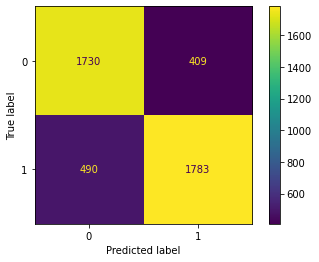

In [ ]:
# make predictions on the testing set for Confusion Matrix
y_pred = rf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr= y_train
y_pr = cross_val_predict(rf, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[7243 1647]
 [1949 6807]]
Accuracy:  0.7962144395330386


## Saving the Model

In [ ]:
import joblib
joblib.dump(rf,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/Random_Forest_final.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/Random_Forest_final.joblib']

## **6.2 XGB Classifier**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
XGBClassifier,422,468,0.8,0.81,0.79,0.8


Confusion [[1717  422]
 [ 468 1805]]


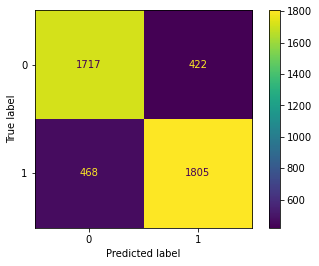

In [ ]:
#Create an XGB Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# make predictions on the testing set
XGB_res = predict_and_evaluate(xgb, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = xgb.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(xgb, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[7172 1718]
 [1821 6935]]
Accuracy:  0.7994446333446673


## Saving the Model

In [ ]:
joblib.dump(xgb,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/XGB_Final.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/XGB_Final.joblib']

## **6.3 SVM**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
SVC,428,526,0.78,0.8,0.77,0.79


Confusion [[1711  428]
 [ 526 1747]]


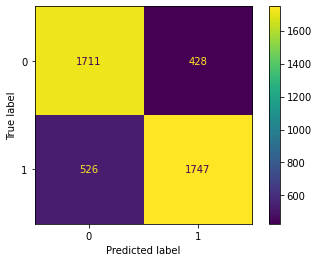

In [ ]:
# create an SVM classifier
SVM= svm.SVC(kernel='linear')

# train the classifier on the training set
SVM.fit(X_train, y_train)

# make predictions on the testing set
SVM_res = predict_and_evaluate(SVM, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = SVM.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(SVM, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[7172 1718]
 [1914 6842]]
Accuracy:  0.7941743171256942


## Saving the Model

In [ ]:
joblib.dump(SVM,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/SVM_Final.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/SVM_Final.joblib']

## **6.4 Gradient Boost**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
GradientBoostingClassifier,386,439,0.81,0.83,0.81,0.82


Confusion [[1753  386]
 [ 439 1834]]


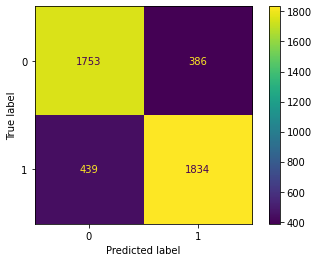

In [ ]:
# create a Gradient Boosting classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# train the classifier on the training set
GB.fit(X_train, y_train)

# make predictions on the testing set
GB_res = predict_and_evaluate(GB, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = GB.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()


## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(GB, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[7239 1651]
 [1718 7038]]
Accuracy:  0.8090785447126828


## Saving the Model

In [ ]:
joblib.dump(GB,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/GB_Final.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/GB_Final.joblib']

## **6.5 Decision Tree Classifier**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
DecisionTreeClassifier,616,684,0.71,0.72,0.7,0.71


Confusion [[1523  616]
 [ 684 1589]]


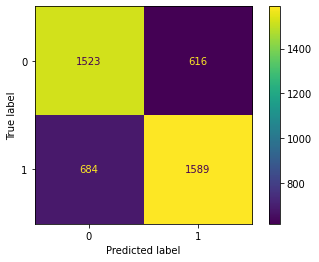

In [ ]:
# create a Gradient Boosting classifier
DT = DecisionTreeClassifier(random_state=42)

# train the classifier on the training set
DT.fit(X_train, y_train)

# make predictions on the testing set
DT_res = predict_and_evaluate(DT, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = DT.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(DT, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[6283 2607]
 [2599 6157]]
Accuracy:  0.7049756318712456


## Saving the Model

In [ ]:
joblib.dump(DT,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/DecisionTree.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/DecisionTree.joblib']

## **6.6 Naive Bayes**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
GaussianNB,885,323,0.73,0.69,0.86,0.76


Confusion [[1254  885]
 [ 323 1950]]


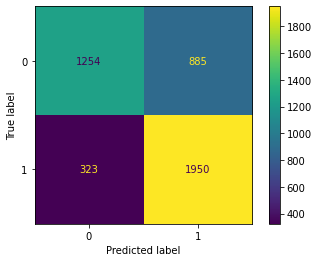

In [ ]:
# create a Naive Bayes classifier
clf_GB = GaussianNB()

# train the classifier on the training set
clf_GB.fit(X_train, y_train)

# make predictions on the testing set
NGB_res = predict_and_evaluate(clf_GB, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = clf_GB.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(clf_GB, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[5224 3666]
 [1208 7548]]
Accuracy:  0.723790094072311


## Saving the Model

In [ ]:
joblib.dump(clf_GB,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/Naive_GB.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/Naive_GB.joblib']

## **6.7 Logistic Regression**

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score
LogisticRegression,440,512,0.78,0.8,0.77,0.79


Confusion [[1699  440]
 [ 512 1761]]


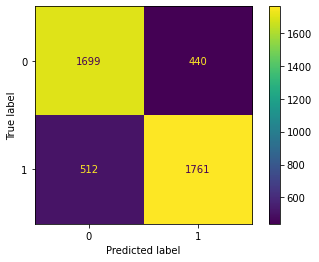

In [ ]:
# create a Logistic Regression classifier
lr= LogisticRegression(random_state=42,max_iter=5000)

# train the classifier on the training set
lr.fit(X_train, y_train)

# make predictions on the testing set
NGB_res = predict_and_evaluate(lr, X_test, y_test)

# make predictions on the testing set for Confusion Matrix
y_pred = lr.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion",confusion_mat)

#Ploting Confusion Matrix
cmdt = confusion_matrix(y_test, y_pred)
dispdt = ConfusionMatrixDisplay(confusion_matrix=cmdt)
dispdt.plot()

## Cross Validation

In [ ]:
y_tr = y_train
y_pr = cross_val_predict(lr, X_train, y_train, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr, y_pr))

[[7129 1761]
 [1880 6876]]
Accuracy:  0.7936642865238581


## Saving the Model

In [ ]:
joblib.dump(lr,'/content/drive/MyDrive/FRAUD DETECTION/MODELS/Logistic_Regression.joblib')

['/content/drive/MyDrive/FRAUD DETECTION/MODELS/Logistic_Regression.joblib']

## **6.8 ANN**

In [ ]:
#Calculating the length of the columns 
n_inputs=(len(X.columns))

#Creating  ANN model
ANN = keras.Sequential()
ANN.add(keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]))
ANN.add(keras.layers.Dense(128,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
#kernal_initializer='he_uniform' ---> weight initializer for relu 
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(64,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(64,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.BatchNormalization())
ANN.add(keras.layers.Dense(32,activation='relu'))
ANN.add(keras.layers.Dropout(0.5))
ANN.add(keras.layers.Dense(1,activation='sigmoid'))
ANN.compile(loss='binary_crossentropy',optimizer='ADAM')
#class_weight=weights_assigned
ANN.fit(X_train,y_train,epochs=100,batch_size=1032)

Epoch 1/100
18/18 [==============================] - 5s 19ms/step - loss: 0.8786
Epoch 2/100
18/18 [==============================] - 0s 19ms/step - loss: 0.7723
Epoch 3/100
18/18 [==============================] - 0s 19ms/step - loss: 0.7083
Epoch 4/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6687
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 0.6235
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 0.5958
Epoch 7/100
18/18 [==============================] - 0s 19ms/step - loss: 0.5866
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: 0.5659
Epoch 9/100
18/18 [==============================] - 0s 21ms/step - loss: 0.5574
Epoch 10/100
18/18 [==============================] - 0s 20ms/step - loss: 0.5427
Epoch 11/100
18/18 [==============================] - 1s 28ms/step - loss: 0.5395
Epoch 12/100
18/18 [==============================] - 0s 27ms/step - loss: 0.5346
Epoch 13/100
18/18 [=====

In [ ]:
#Model prediction
y_pred= ANN.predict(X_test)
#Predicting  on Models
y_pred01=np.round(y_pred)
y_pred01=y_pred01.astype(int)

138/138 [==============================] - 1s 3ms/step


In [ ]:
print("ROC_AUC Details:",roc_auc_score(y_test,y_pred))

ROC_AUC Details: 0.8954699629592835


In [ ]:
#y_pred01=np.round(y_pred)
#y_pred01=y_pred01.astype(int)
print(classification_report(y_test, y_pred01))
print(confusion_matrix(y_test,y_pred01))

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.65      2139
         1.0       1.00      0.01      0.01      2273

    accuracy                           0.49      4412
   macro avg       0.74      0.50      0.33      4412
weighted avg       0.75      0.49      0.32      4412

[[2139    0]
 [2257   16]]


## **Saving the model**

In [ ]:
model.save('/content/drive/MyDrive/FRAUD DETECTION/MODELS/ANN.h5')